In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [30]:
d0 = pd.read_csv('mnist_train.csv')
l = d0['label']
d = d0.drop("label", axis=1)

In [31]:
labels = l.head(42000)
data = d.head(42000)

In [32]:
sample_data = StandardScaler().fit_transform(data)
sample_data.shape

C:\Users\Irfan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Irfan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(42000, 784)

In [33]:
from sklearn import decomposition
pca = decomposition.PCA()

In [34]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

In [35]:
pca_data.shape

(42000, 2)

In [36]:
import seaborn as sn

       1st_Principle  2nd_Principle  Label
0          -0.954913      -4.870334    5.0
1           8.689177      -7.872718    0.0
2           2.353376       9.183245    4.0
3          -6.676130      -3.521052    1.0
4          -5.034134       2.753564    9.0
5           2.220141      -3.152658    2.0
6          -6.854733       1.110413    1.0
7           1.926131      -5.647419    3.0
8          -7.904563       0.429553    1.0
9          -3.188476      -4.863975    4.0
10         -3.197043      -2.189009    3.0
11         -4.158402      -4.114923    5.0
12          3.887481      10.838012    3.0
13          0.965927      -3.710395    6.0
14         -7.698791      -0.021322    1.0
15         -2.830855      -1.084558    7.0
16          1.909374      -0.401152    2.0
17         -4.317764      -6.621164    8.0
18         -3.416197      -0.830507    6.0
19         -8.095448      -2.251100    9.0
20          5.663993      13.532490    4.0
21         10.390966      -8.501970    0.0
22         

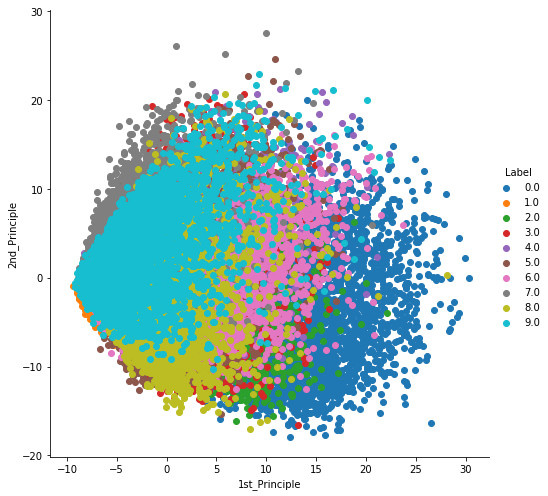

In [37]:
pca_data = np.vstack((pca_data.T, labels)).T

pca_df = pd.DataFrame(data=pca_data, columns=("1st_Principle","2nd_Principle","Label"))
print(pca_df)
sn.FacetGrid(pca_df, hue="Label",height=7).map(plt.scatter,'1st_Principle','2nd_Principle').add_legend()
plt.show()